In [4]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt    

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Error loading stopwords: <urlopen error [Errno 60]
[nltk_data]     Operation timed out>


In [ ]:
use_cols = ['airline_sentiment', 'text', 'airline']

df = pd.read_csv('Tweets.csv', usecols = use_cols)

df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [18]:
stop_words = stopwords.words('english')

df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

countVect = CountVectorizer(min_df= 10)

binaryVector = countVect.fit_transform(df.text_without_stopwords)

In [19]:
# Seperate dataset into test and train

y = df.airline_sentiment
X = binaryVector

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=123)

print([x.shape for x in [train_X, test_X, train_y, test_y]])
[(10980, 1872), (3660, 1872), (10980,), (3660,)]

[(10980, 1872), (3660, 1872), (10980,), (3660,)]


[(10980, 1872), (3660, 1872), (10980,), (3660,)]

In [20]:
# Now for testing the naive bayes model

MNB = MultinomialNB()
MNB.fit(train_X, train_y)

predicted = MNB.predict(test_X)
accuracy_score = metrics.accuracy_score(predicted, test_y)
confusion_count = metrics.confusion_matrix(predicted, test_y)


print('Accuracy: ',accuracy_score,'\n')
print('Confusion Matrix:\n',confusion_count)

Accuracy:  0.7808743169398907 

Confusion Matrix:
 [[2015  304   76]
 [ 186  430   60]
 [ 111   65  413]]


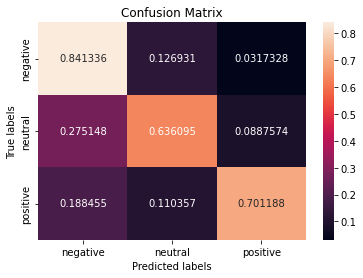

In [21]:
# Lets plot the results properly

confusion = metrics.confusion_matrix(predicted, test_y, normalize = 'true')

ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);
